# Overview

The following notebook supports a study of classifier methods used in contemporary machine learning. This specific experiment provides Python implementations as a basis for comparisons of performance using the same dataset and evaluation criteria. This is by no means exhaustive, but illustrative in the differences between each method, and informative in which perform better on different types of data.

## Data

The data being used for this experiment is part of the sci-kit package, the MNIST images of handwritten digits. It is often used in machine learning as a validation set as it is a known quantity, comes cleansed, labeled, and packaged with sci-kit. It contains 60,000 training images and 10,000 test images.<br><br>
More information on the dataset can be found here:<br>
<a href="http://yann.lecun.com/exdb/mnist/">http://yann.lecun.com/exdb/mnist/</a><br>
<a href="https://srdata.nist.gov/gateway/gateway?keyword=handwriting+recognition">https://srdata.nist.gov/gateway/gateway?keyword=handwriting+recognition</a>

In [2]:
#Data setup
from sklearn.datasets import fetch_mldata
mnist_dataset = fetch_mldata('MNIST original')

In [3]:
dir(mnist_dataset)

['COL_NAMES', 'DESCR', 'data', 'target']

In [4]:
X, y = mnist_dataset['data'], mnist_dataset['target']
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
#Let us examine the raw data of a single image
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
random_digit = X[36000]
#Reshape to 28 x 28 for the 784 available features
random_digit_image = random_digit.reshape(28,28)
random_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  86, 131, 225, 225, 225,   0,   0,
          0,   0],
       [  

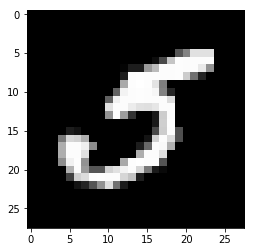

In [8]:
#Let's plot to see what the actual image looks like
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(random_digit_image, cmap='gray')

In [9]:
#Check the label
y[36000]

5.0

Now that the dataset is established, we now split into training and test sets. There are a variety of means of handling this including more advanced techniques like stratified sampling. For the sake of simplicity and abstraction we use the split capabilities of sklearn.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist_dataset.data, mnist_dataset.target, 
                                                    test_size=0.1, random_state=0)

In [11]:
X_train.shape

(63000, 784)

In [12]:
X_test.shape

(7000, 784)

In [13]:
y_test.shape

(7000,)

In [14]:
y_train.shape

(63000,)

# Logistic Regression

Logistic Regression is a versatile classifier that can be used for binary and multiclass categorization problems. At its heart is a decision function that assess a probability that will determine which categorization is selected by the algorithm. In a multinomial case it will take a "one vs rest" evaluation approach.

In [15]:
from sklearn.linear_model import LogisticRegression
logregress = LogisticRegression(solver = 'lbfgs')

In [16]:
#Train the model
logregress.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
#Now run predictions using the test set
logregress_predictions = logregress.predict(X_test)

In [18]:
#The mean accuracy on given test data and labels
#In multi-label classification, this is the  accuracy for each label's correct prediction
logregress_score = logregress.score(X_test, y_test)
print (logregress_score)

0.916


In [19]:
#Confirming that a multinomial model is being used
logregress.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

Examine a subset of the predicted values against the test set

In [26]:
logregress_predictions[20:30]

array([ 3.,  8.,  5.,  8.,  1.,  2.,  3.,  7.,  5.,  5.])

In [27]:
y_test[20:30]

array([ 9.,  8.,  5.,  8.,  1.,  2.,  3.,  7.,  5.,  5.])

Some inaccuracies are seen. Let's look at the performance mesasures to determine which labels were recognized better than others.

In [33]:
#Additional performance measures
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, logregress_predictions))

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96       660
        1.0       0.95      0.97      0.96       779
        2.0       0.91      0.90      0.91       688
        3.0       0.89      0.89      0.89       733
        4.0       0.92      0.92      0.92       640
        5.0       0.90      0.84      0.87       651
        6.0       0.95      0.98      0.96       738
        7.0       0.93      0.93      0.93       724
        8.0       0.86      0.86      0.86       672
        9.0       0.89      0.89      0.89       715

avg / total       0.92      0.92      0.92      7000



In [18]:
#Confusion matrix. Higher values along the diagonal are better
print("Confusion matrix:\n%s" % confusion_matrix(y_test, logregress_predictions))

Confusion matrix:
[[640   0   2   2   2   3   5   1   5   0]
 [  0 755   5   3   1   2   3   0   9   1]
 [  1   6 622  10   5   3   7  11  23   0]
 [  0   6  20 655   0  19   2   8  16   7]
 [  5   2   3   1 588   2   7   3   4  25]
 [  4   4   9  28   9 548  13   4  24   8]
 [  3   2   4   0   3   4 720   0   2   0]
 [  4   1  10   2   7   0   0 671   3  26]
 [  4  14  10  20   3  26   3   4 578  10]
 [  7   2   1  14  24   5   0  20   7 635]]


Mean accuracy: 91.6% <br>
Precision: 92% <br>
Recall: 92% <br>
F1-Score: 92% <br>
Labels with the most errors: "3", "8", "9" <br>

# Stochastic Gradient Descent

Stochastic Gradient Descent is in the family of Gradient Descent algorithms. It takes a sample of feature vectors, hence its stochastic nature, and performs an incremental gradient descent by trying to find a minimum. It is generally faster in its execution than mini-batch gradient descent, and is faster than full-batch gradient descent.

In [28]:
from sklearn.linear_model import SGDClassifier

In [29]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [30]:
sgd_predictions = sgd_clf.predict(X_test)

In [31]:
sgd_score = sgd_clf.score(X_test, y_test)
print(sgd_score)

0.889142857143


In [34]:
print(classification_report(y_test, sgd_predictions))

             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94       660
        1.0       0.95      0.95      0.95       779
        2.0       0.89      0.90      0.89       688
        3.0       0.87      0.88      0.87       733
        4.0       0.92      0.89      0.90       640
        5.0       0.85      0.78      0.81       651
        6.0       0.97      0.92      0.94       738
        7.0       0.88      0.92      0.90       724
        8.0       0.78      0.85      0.81       672
        9.0       0.87      0.81      0.84       715

avg / total       0.89      0.89      0.89      7000



In [35]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, sgd_predictions))

Confusion matrix:
[[642   0   4   3   2   1   2   2   4   0]
 [  0 742   9   4   1   7   0   0  14   2]
 [  0   8 620  14   5   2   5  13  18   3]
 [  4   2  15 643   1  32   1  10  17   8]
 [  5   0   2   1 570   2   4   7  22  27]
 [ 13   5  10  24  12 509   8   7  57   6]
 [ 18   1  17   0   2  16 679   0   5   0]
 [  4   0   5   4  10   1   1 669   0  30]
 [  3  18  15  26   1  19   1  10 570   9]
 [ 13   1   1  23  17  13   0  43  24 580]]


Mean accuracy: 88.9% <br>
Precision: 89% <br>
Recall: 89% <br>
F1-Score: 89% <br>
Labels with the most errors: "5", "3", "8", "7" <br>

# Scalable Vector Machine

Scalable Vector Machine works by expressing observations into multidimensional space. The algorithm forms "roads" separating the different categories by creating hyperplanes for their separation and classification.

In [36]:
from sklearn.svm import LinearSVC

scalable_vec_machine = LinearSVC(C=1, loss="hinge")
scalable_vec_machine.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [37]:
svm_predictions = scalable_vec_machine.predict(X_test)

In [38]:
svn_score = scalable_vec_machine.score(X_test, y_test)
print(svn_score)

0.865


Adjusting hyperparameters to try coaxing better performance

In [39]:
scalable_vec_machinel2 = LinearSVC(C=4, loss="hinge")
scalable_vec_machinel2.fit(X_train, y_train)

LinearSVC(C=4, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [40]:
svm_predictions2 = scalable_vec_machinel2.predict(X_test)

In [41]:
svn_score2 = scalable_vec_machinel2.score(X_test, y_test)
print(svn_score2)

0.867142857143


In [42]:
scalable_vec_machinel3 = LinearSVC(C=0.5, loss="hinge")
scalable_vec_machinel3.fit(X_train, y_train)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [43]:
svn_score3 = scalable_vec_machinel3.score(X_test, y_test)
print(svn_score3)

0.865


Decrease in mean accuracy. Selecting the second model for performance measures and evaluation

In [44]:
print(classification_report(y_test, svm_predictions2))

             precision    recall  f1-score   support

        0.0       0.84      0.98      0.91       660
        1.0       0.97      0.95      0.96       779
        2.0       0.71      0.92      0.80       688
        3.0       0.93      0.74      0.82       733
        4.0       0.93      0.88      0.90       640
        5.0       0.82      0.79      0.81       651
        6.0       0.93      0.96      0.94       738
        7.0       0.81      0.93      0.87       724
        8.0       0.86      0.72      0.78       672
        9.0       0.91      0.79      0.85       715

avg / total       0.87      0.87      0.87      7000



In [45]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, svm_predictions2))

Confusion matrix:
[[646   0   1   2   1   2   3   3   2   0]
 [  1 738  10   1   1  11   3   4   9   1]
 [  3   2 633   5   2   4  12  13  14   0]
 [ 15   4 100 542   0  28   4  25   9   6]
 [ 17   2  12   0 562   6   4   8   8  21]
 [ 32   3  24  11   5 515  24   6  22   9]
 [ 13   1   7   0   2   1 711   1   2   0]
 [  8   0  22   0   7   0   0 676   3   8]
 [ 18   8  68  14   5  47   7  14 483   8]
 [ 14   1   9   9  18  11   0  80   9 564]]


Mean accuracy: 88.3% <br>
Precision: 88% <br>
Recall: 88% <br>
F1-Score: 88% <br>
Labels with the most errors: "3", "8", "5" <br>

# Perceptron

The Perceptron model is a fundamental building block of Artificial Neural Networks, it is closely related to Stochastic Gradient Descent and follows the same iterative procedure of minimizing an error function.

In [46]:
from sklearn.linear_model import Perceptron
perceptron_clf = Perceptron()
perceptron_clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [47]:
perceptron_predictions = perceptron_clf.predict(X_test)

In [52]:
perceptron_score = perceptron_clf.score(X_test, y_test)
print(perceptron_score)

0.89


In [49]:
print(classification_report(y_test, perceptron_predictions))

             precision    recall  f1-score   support

        0.0       0.97      0.94      0.96       660
        1.0       0.96      0.94      0.95       779
        2.0       0.89      0.88      0.88       688
        3.0       0.84      0.89      0.87       733
        4.0       0.88      0.92      0.90       640
        5.0       0.85      0.84      0.84       651
        6.0       0.97      0.92      0.95       738
        7.0       0.93      0.86      0.90       724
        8.0       0.76      0.85      0.81       672
        9.0       0.86      0.83      0.85       715

avg / total       0.89      0.89      0.89      7000



In [50]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, perceptron_predictions))

Confusion matrix:
[[623   0   5   5   2   9   4   2  10   0]
 [  0 736   2   9   1  10   0   1  18   2]
 [  1   8 605  21   5   3   5   6  31   3]
 [  0   1  21 656   1  24   1   5  19   5]
 [  4   1   7   1 587   1   4   2  14  19]
 [  2   2  10  29   9 547   7   3  36   6]
 [  3   2  11   0  11  15 681   0  15   0]
 [  1   0   8  12  10   1   0 626   9  57]
 [  2  13   8  30   6  27   1   6 572   7]
 [  6   2   3  17  36   7   0  22  25 597]]


# Multilayer Perceptron

The Multilayer Perceptron is a type of Artifical Neural Network. It differs from the Perceptron model in that it can contain one or many hidden layers.

In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
mlp_clf = MLPClassifier(solver='sgd', activation='relu', hidden_layer_sizes=(100), alpha=0.0001,
                       learning_rate_init=0.001, learning_rate='adaptive', verbose=True)

In [27]:
mlp_clf.fit(X_train, y_train)

Iteration 1, loss = 2.02638774
Iteration 2, loss = 1.45543766
Iteration 3, loss = 1.29047532
Iteration 4, loss = 1.09103654
Iteration 5, loss = 0.91984541
Iteration 6, loss = 0.77203245
Iteration 7, loss = 0.73428491
Iteration 8, loss = 0.64824450
Iteration 9, loss = 0.61352885
Iteration 10, loss = 0.58031264
Iteration 11, loss = 0.55977070
Iteration 12, loss = 0.56601589
Iteration 13, loss = 0.53656548
Iteration 14, loss = 0.52808469
Iteration 15, loss = 0.53156162
Iteration 16, loss = 0.51933094
Iteration 17, loss = 0.49848795
Iteration 18, loss = 0.45651464
Iteration 19, loss = 0.42979631
Iteration 20, loss = 0.41488604
Iteration 21, loss = 0.40217192
Iteration 22, loss = 0.39249995
Iteration 23, loss = 0.38874476
Iteration 24, loss = 0.38057261
Iteration 25, loss = 0.37540719
Iteration 26, loss = 0.36900653
Iteration 27, loss = 0.36740460
Iteration 28, loss = 0.35793926
Iteration 29, loss = 0.36097530
Iteration 30, loss = 0.35740798
Iteration 31, loss = 0.34999102
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [28]:
mlp_predictions = mlp_clf.predict(X_test)

In [29]:
mlp_score = mlp_clf.score(X_test, y_test)
print(mlp_score)

0.926142857143


In [30]:
print(classification_report(y_test, mlp_predictions))

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96       660
        1.0       0.97      0.96      0.96       779
        2.0       0.93      0.92      0.92       688
        3.0       0.90      0.89      0.90       733
        4.0       0.91      0.94      0.92       640
        5.0       0.90      0.89      0.90       651
        6.0       0.96      0.96      0.96       738
        7.0       0.94      0.93      0.93       724
        8.0       0.91      0.91      0.91       672
        9.0       0.88      0.88      0.88       715

avg / total       0.93      0.93      0.93      7000



In [31]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, mlp_predictions))

Confusion matrix:
[[639   0   1   2   2   1   7   0   6   2]
 [  0 749   5   8   0   3   0   0  11   3]
 [  2   6 635  11   7   0   8  10   8   1]
 [  1   2  19 652   0  27   3   4  16   9]
 [  1   1   2   0 600   7   3   4   2  20]
 [  5   4   6  15   5 581   8   2  13  12]
 [  5   2   5   0   8   2 711   0   2   3]
 [  3   2   9   5   5   2   1 672   0  25]
 [  7   7   4  14   2  14   1   1 614   8]
 [  2   2   0  15  29  10   0  25   2 630]]


# Deep Neural Network

Note that the following implementation is sourced from the TensorFlow project (https://www.tensorflow.org/get_started/mnist/beginners). It uses the APIs and libraries available in TensorFlow to construct a Deep Neural Network in a similar fashion to the Multilayer Perceptron.

In [1]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [2]:
#setup and initialize weight and bias to 0 values
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [3]:
#setup and initialize feature vector - x_tf, yhat or true distribution y_, and y or predicted distribution - y_tf 
x_tf = tf.placeholder(tf.float32, [None, 784])
y_tf = tf.nn.softmax(tf.matmul(x_tf, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

In [4]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_tf), reduction_indices=[1]))

In [5]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [6]:
#Execution
sess = tf.InteractiveSession()

In [7]:
tf.global_variables_initializer().run()

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x_tf: batch_xs, y_: batch_ys})

In [10]:
correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))

In [11]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
print(sess.run(accuracy, feed_dict={x_tf: mnist.test.images, y_: mnist.test.labels}))

0.9207


# Citations

This experiment and notebook leverage libraries and packages made available through the scikit-learn project. Necessary citation is made here: Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.<br> <br>
Additional reference and citation is also made for TensorFlow and using its neural network code and libraries.